In [1]:
import pandas as pd  # untuk analisa dataframe
import numpy as np # untuk perhitungan statistik
import matplotlib.pyplot as plt # untuk visualisasi
import seaborn as sns # untuk visualisasi
import missingno as msno  # untuk visualisasi missing valeu
from sklearn.preprocessing import LabelEncoder ## Untuk Tranformasi Data

import warnings
warnings.simplefilter(action='ignore')

In [2]:
#load data
df = pd.read_excel('ECommerceDataset.xlsx' , sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
#mencari presentase customer churn
jumlah_churn = df['Churn'].value_counts()

# Menampilkan hasil
print(jumlah_churn)

Churn
0    4682
1     948
Name: count, dtype: int64


In [4]:
# menampilkan presentase customer churn
a = (948/5630)* 100

print(a, "%")

16.838365896980463 %


In [5]:
#mengecek missing value
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

<Axes: >

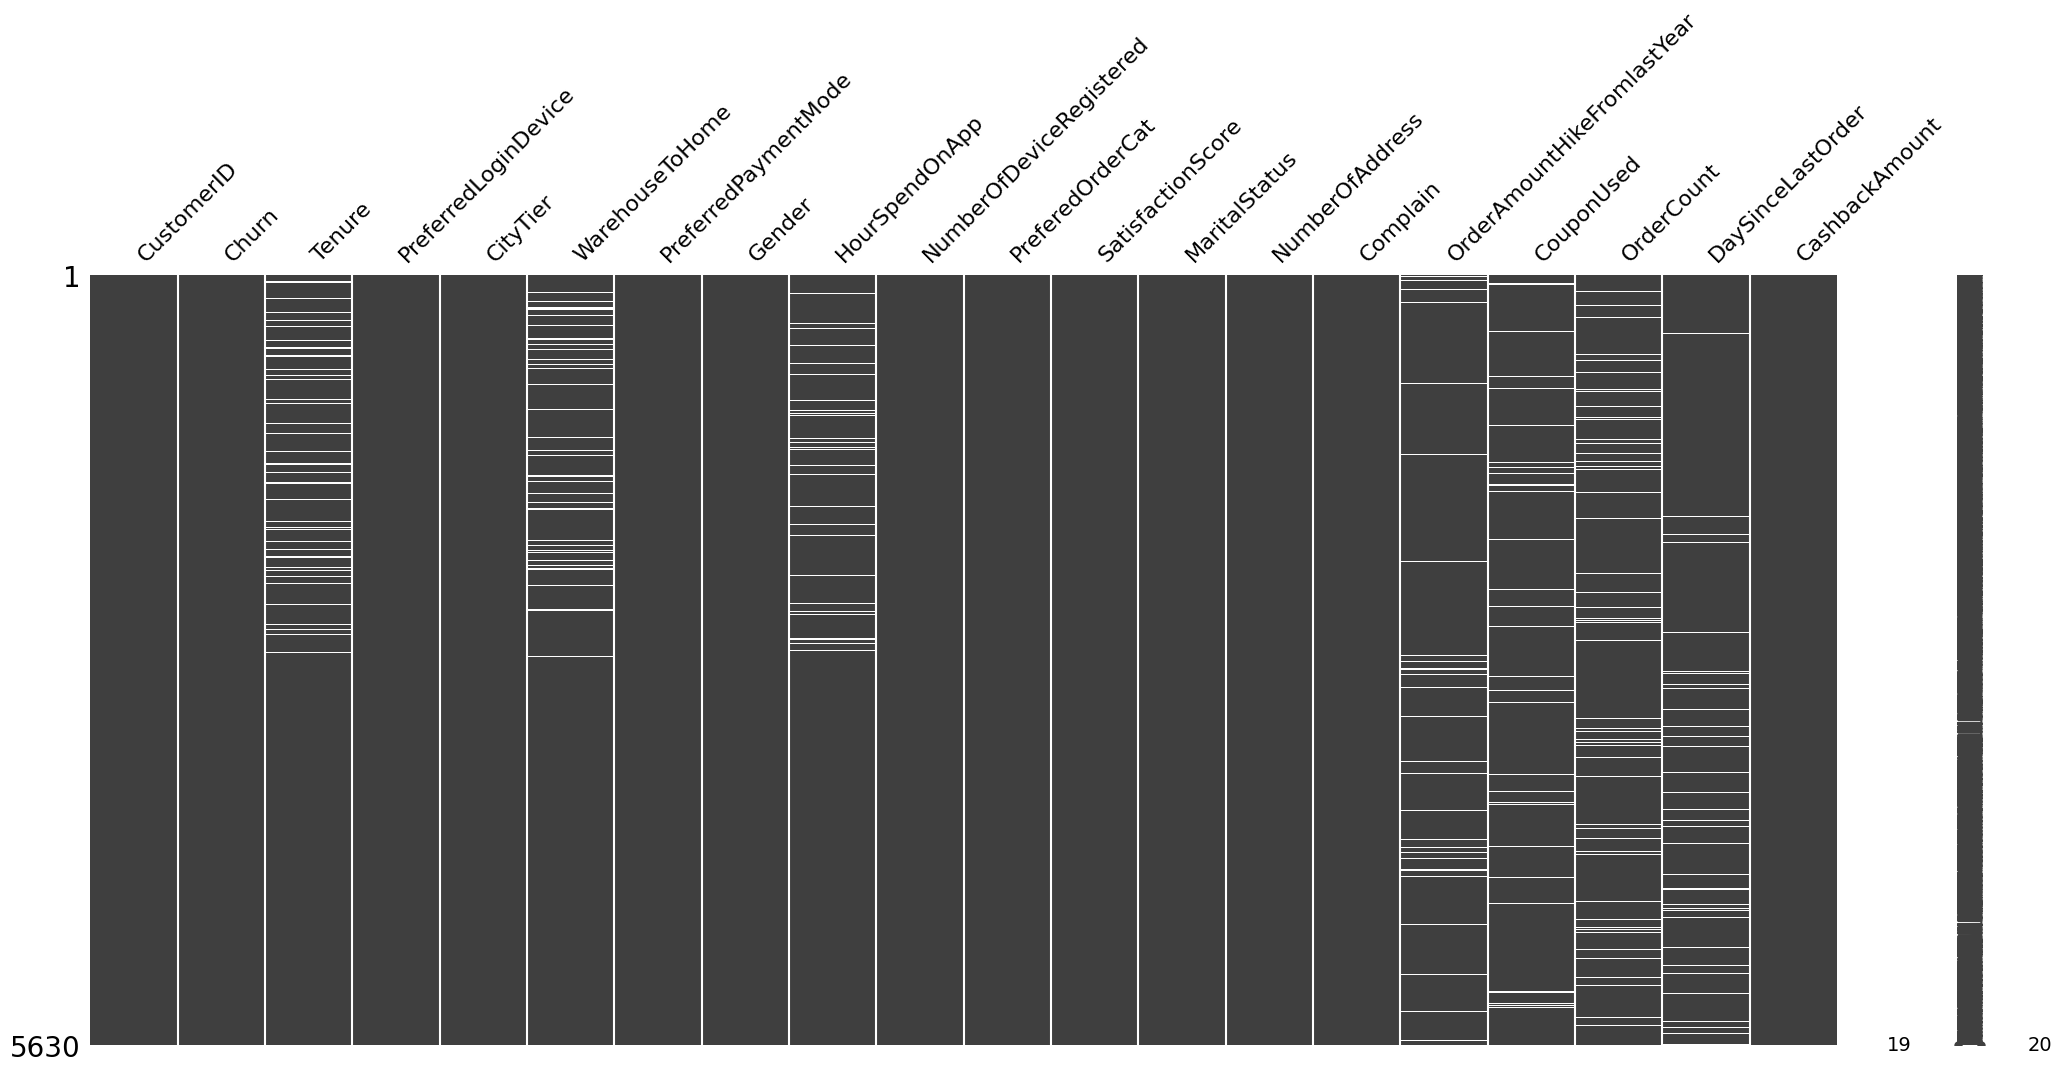

In [6]:
#visualiasi missing value 
import missingno as msno
msno.matrix(df)

In [7]:
# Menghitung jumlah missing value pada tiap kolom
df.isna().sum() / len(df) * 100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [8]:
# #Mengisi missing value dengan median

# tenure = df["Tenure"].median()
# df["Tenure"] = df["Tenure"].fillna(tenure)
# warehouseToHome = df["WarehouseToHome"].median()
# df["WarehouseToHome"] = df["WarehouseToHome"].fillna(warehouseToHome)
# couponUsed = df["CouponUsed"].median()
# df["CouponUsed"] = df["CouponUsed"].fillna(couponUsed)
# orderCount = df["OrderCount"].median()
# df["OrderCount"] = df["OrderCount"].fillna(orderCount)
# daySinceLastOrder = df["DaySinceLastOrder"].median()
# df["DaySinceLastOrder"] = df["DaySinceLastOrder"].fillna(daySinceLastOrder)

In [9]:
# #Mengisi missing value dengan rata-rata
# hourSpendOnApp = df["HourSpendOnApp"].mean()
# df["HourSpendOnApp"] = df["HourSpendOnApp"].fillna(hourSpendOnApp)
# orderAmountHikeFromlastYear = df["OrderAmountHikeFromlastYear"].mean()
# df["OrderAmountHikeFromlastYear"] = df["OrderAmountHikeFromlastYear"].fillna(orderAmountHikeFromlastYear)

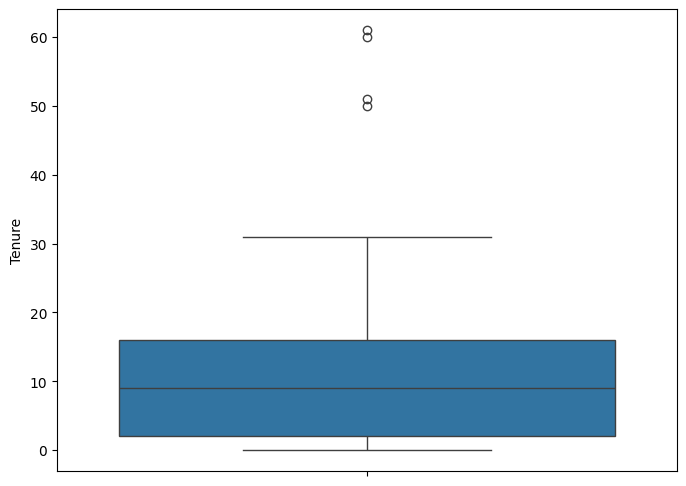

In [10]:
# Mengatasi missing value pada kolom tenure
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Tenure'])

# Mengisi nilai yang hilang pada kolom Tenure dengan median.
tenure = df["Tenure"].median()
df["Tenure"] = df["Tenure"].fillna(tenure)


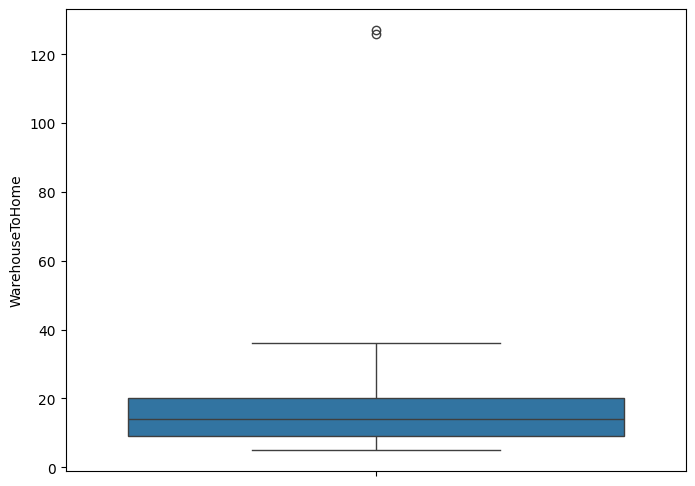

In [11]:
# Mengatasi missing value pada kolom WarehouseToHome
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['WarehouseToHome'])
# Mengisi nilai yang hilang pada kolom WarehouseToHome dengan median.
warehouseToHome = df["WarehouseToHome"].median()
df["WarehouseToHome"] = df["WarehouseToHome"].fillna(warehouseToHome)

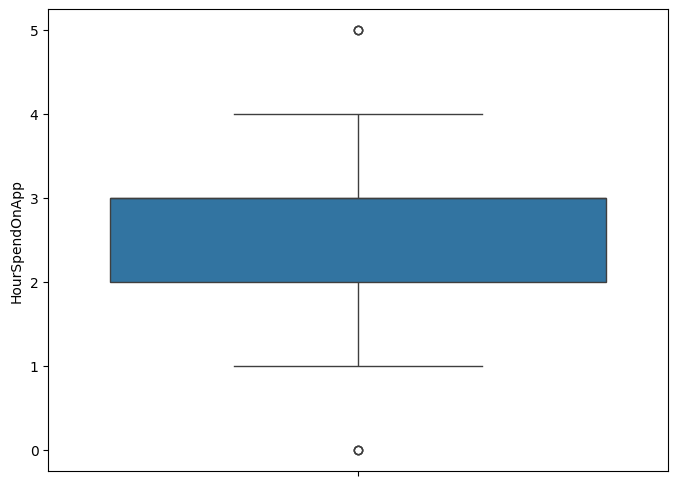

In [12]:
# Mengatasi missing value pada kolom HourSpendOnApp
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['HourSpendOnApp'])
# Mengisi nilai yang hilang pada kolom Embarked dengan rata-rata.
hourSpendOnApp = df["HourSpendOnApp"].mean()
df["HourSpendOnApp"] = df["HourSpendOnApp"].fillna(hourSpendOnApp)

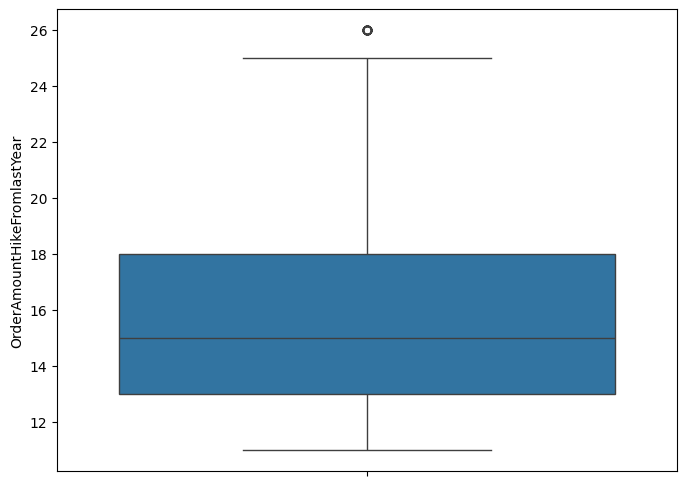

In [13]:
# Mengatasi missing value pada kolom OrderAmountHikeFromlastYear
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['OrderAmountHikeFromlastYear'])
# Mengisi nilai yang hilang pada kolom Embarked dengan rata-rata.
orderAmountHikeFromlastYear = df["OrderAmountHikeFromlastYear"].mean()
df["OrderAmountHikeFromlastYear"] = df["OrderAmountHikeFromlastYear"].fillna(orderAmountHikeFromlastYear)

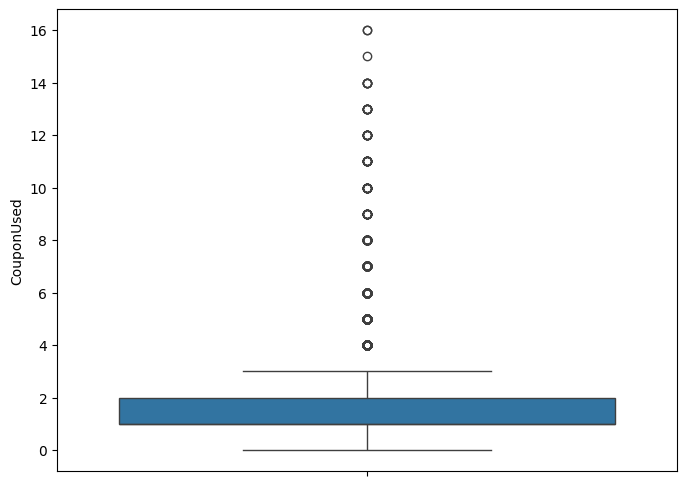

In [14]:
# Mengatasi missing value pada kolom CouponUsed
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['CouponUsed'])
# Mengisi nilai yang hilang pada kolom CouponUsed dengan median.
couponUsed = df["CouponUsed"].median()
df["CouponUsed"] = df["CouponUsed"].fillna(couponUsed)

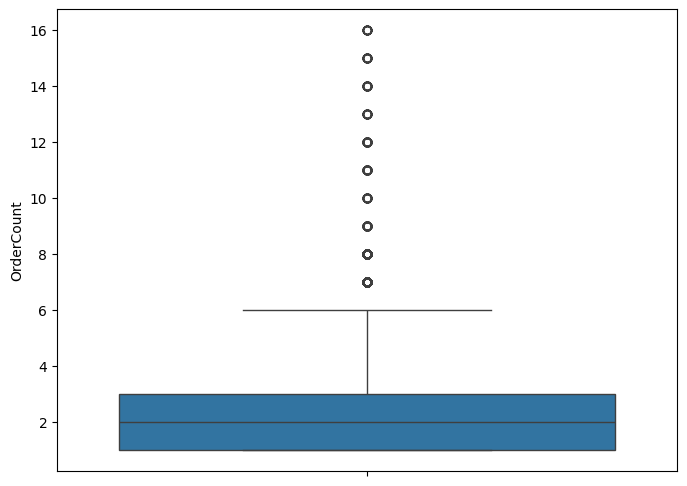

In [15]:
# Mengatasi missing value pada kolom OrderCount
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['OrderCount'])
# Mengisi nilai yang hilang pada kolom OrderCount dengan median.
orderCount = df["OrderCount"].median()
df["OrderCount"] = df["OrderCount"].fillna(orderCount)

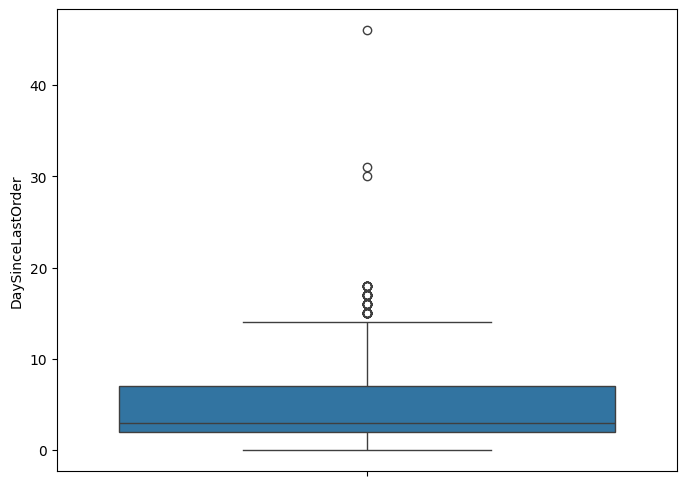

In [16]:
# Mengatasi missing value pada kolom DaySinceLastOrder
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['DaySinceLastOrder'])
# Mengisi nilai yang hilang pada kolom Embarked dengan median.
daySinceLastOrder = df["DaySinceLastOrder"].median()
df["DaySinceLastOrder"] = df["DaySinceLastOrder"].fillna(daySinceLastOrder)

In [17]:
df.isna().sum()


CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [18]:
#mengecek data duplikat
df.duplicated().sum()

0

In [19]:
#Mengatasi Outliers
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Mendefinisikan Batas Atas dah Batas Bawah
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # Membuat filter Outliers
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

In [20]:
# Melakukan handling pada kolom yang memiliki outliers 
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07


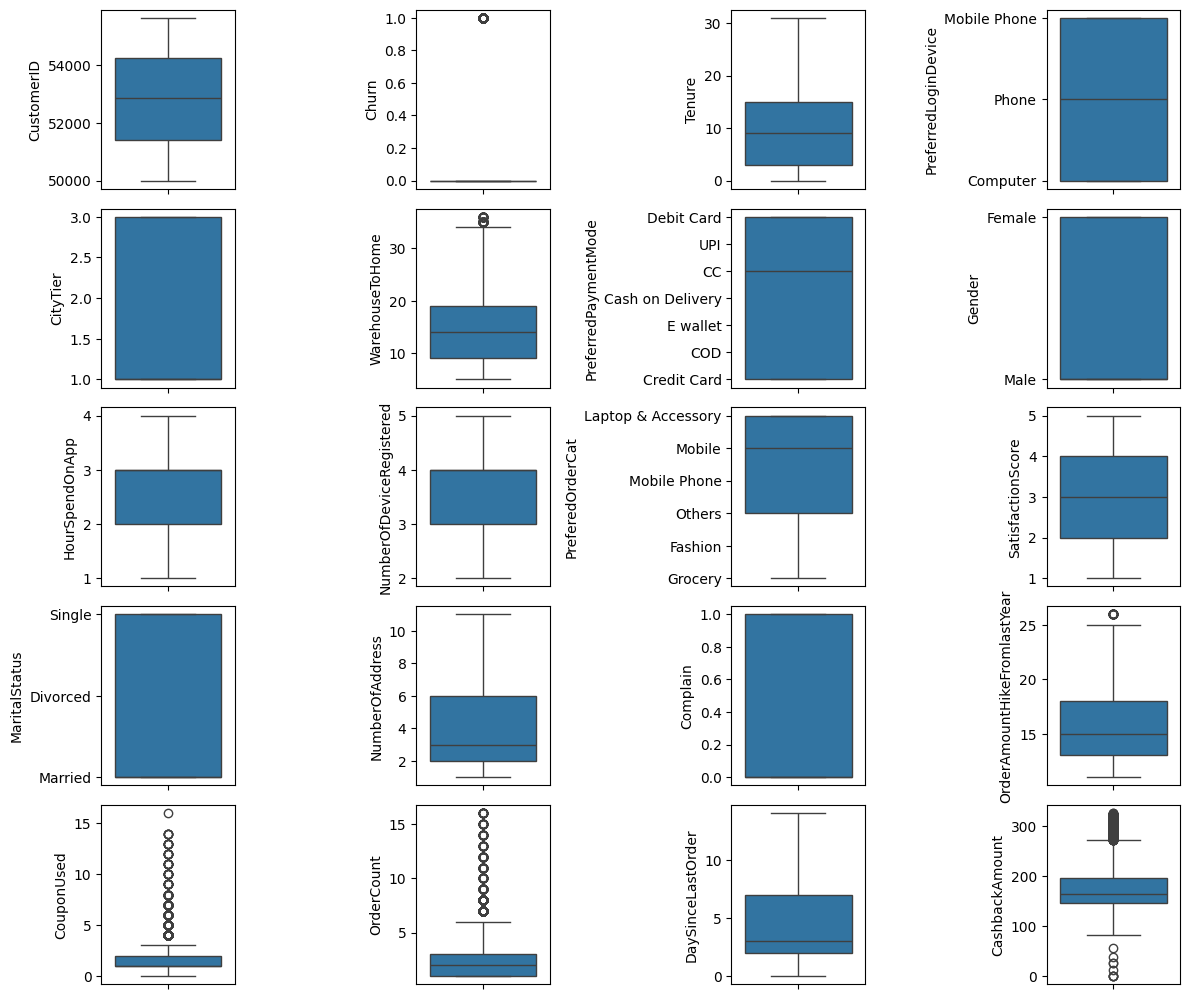

In [21]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [22]:
# menangani inkonsistensi data kolom PreferredLoginDevice
df["PreferredLoginDevice"].unique()
df["PreferredLoginDevice"].value_counts()


PreferredLoginDevice
Mobile Phone    2537
Computer        1501
Phone           1119
Name: count, dtype: int64

In [23]:
# mapping inkonsisten ke format yang benar
map_inkonsistent_PreferredLoginDevice = {
    "Mobile Phone" : "Phone"
}
df["PreferredLoginDevice"].replace(map_inkonsistent_PreferredLoginDevice, inplace=True)

In [24]:
# menangani inkonsistensi data kolom PreferredPaymentMode
df["PreferredPaymentMode"].unique()
df["PreferredPaymentMode"].value_counts()


PreferredPaymentMode
Debit Card          2100
Credit Card         1380
E wallet             575
UPI                  379
COD                  340
CC                   248
Cash on Delivery     135
Name: count, dtype: int64

In [25]:
# mapping inkonsisten ke format yang benar
map_inkonsistent_PreferredPaymentMode = {
    "Cash on Delivery" : "COD",
    "CC": "Credit Card"
}
df["PreferredPaymentMode"].replace(map_inkonsistent_PreferredPaymentMode, inplace=True)

In [26]:
# menangani inkonsistensi data kolom PreferedOrderCat
df["PreferedOrderCat"].unique()
df["PreferedOrderCat"].value_counts()


PreferedOrderCat
Laptop & Accessory    1881
Mobile Phone          1182
Fashion                774
Mobile                 727
Grocery                358
Others                 235
Name: count, dtype: int64

In [27]:
# mapping inkonsisten ke format yang benar
map_inkonsistent_PreferedOrderCat = {
    "Mobile" : "Mobile Phone"
}
df["PreferedOrderCat"].replace(map_inkonsistent_PreferedOrderCat, inplace=True)

In [28]:
df.drop('CustomerID' , axis = 1 , inplace = True)

In [29]:
# convert num_cols to categories
df2 = df.copy()
for col in df2.columns:
  if col == 'CustomerID':
    continue

  else:
    if df2[col].dtype == 'int':
      df2[col] = df[col].astype(str)

df2.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

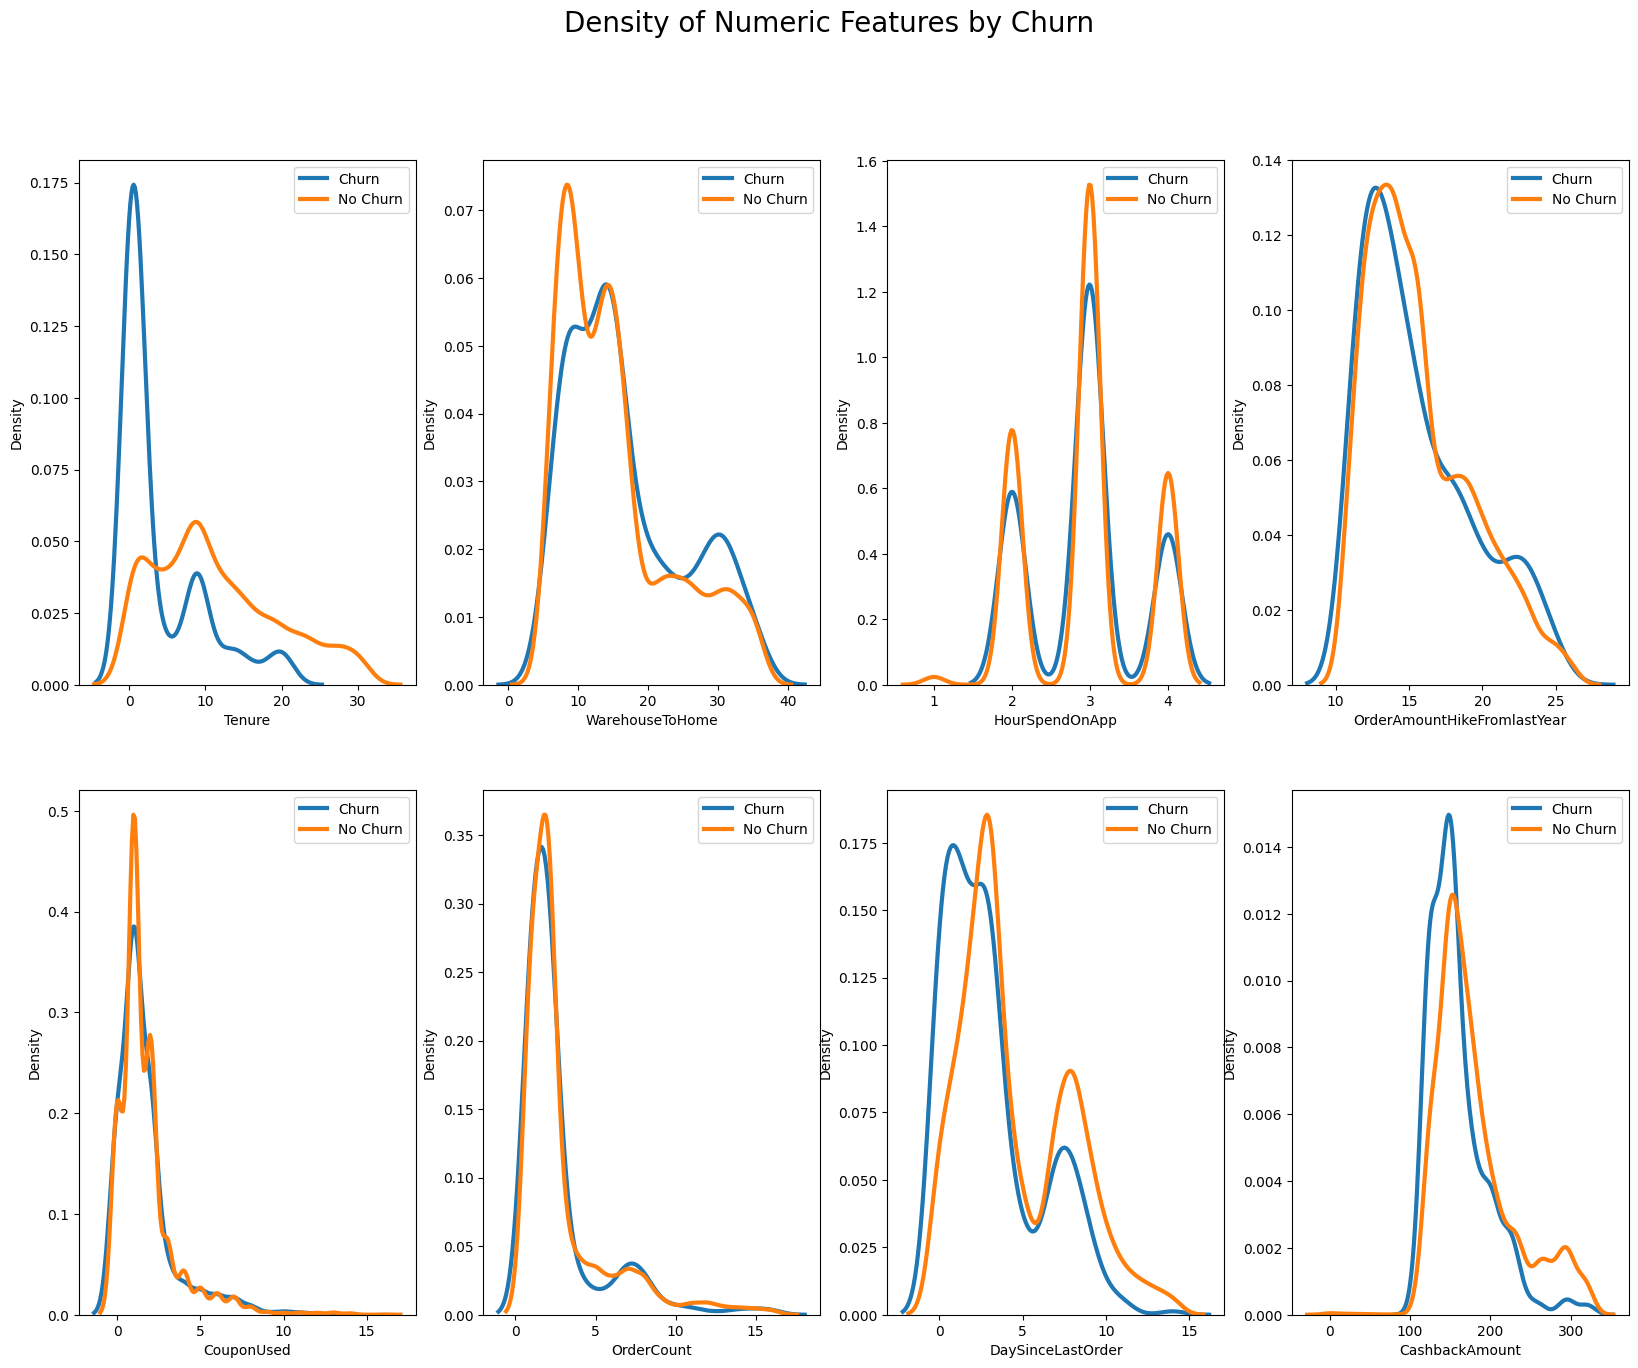

In [31]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

Text(0, 0.5, 'Churn Rate')

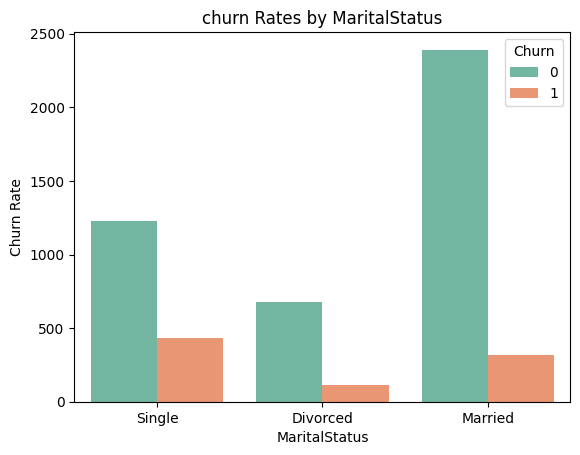

In [32]:
sns.countplot(x='MaritalStatus',hue='Churn',data=df,palette='Set2')
plt.title("churn Rates by MaritalStatus")
plt.ylabel("Churn Rate")

In [33]:
# cat columns
data = df[df.select_dtypes(exclude=np.number).columns]
data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile Phone,Single
2,Phone,Debit Card,Male,Mobile Phone,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,Credit Card,Male,Mobile Phone,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Phone,Credit Card,Male,Fashion,Married
5627,Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [34]:
# # #save data yang sudah bersih 
# df.to_excel('1Final_Clean_Ecommerrce_Dataset.xlsx', index=False)

In [35]:
le = LabelEncoder()

In [36]:
# Encode for cat_cols
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07


In [37]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(4)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,1,2,0,2,2
1,1,4,1,3,2
2,1,2,1,3,2
3,1,2,1,2,2


<Axes: >

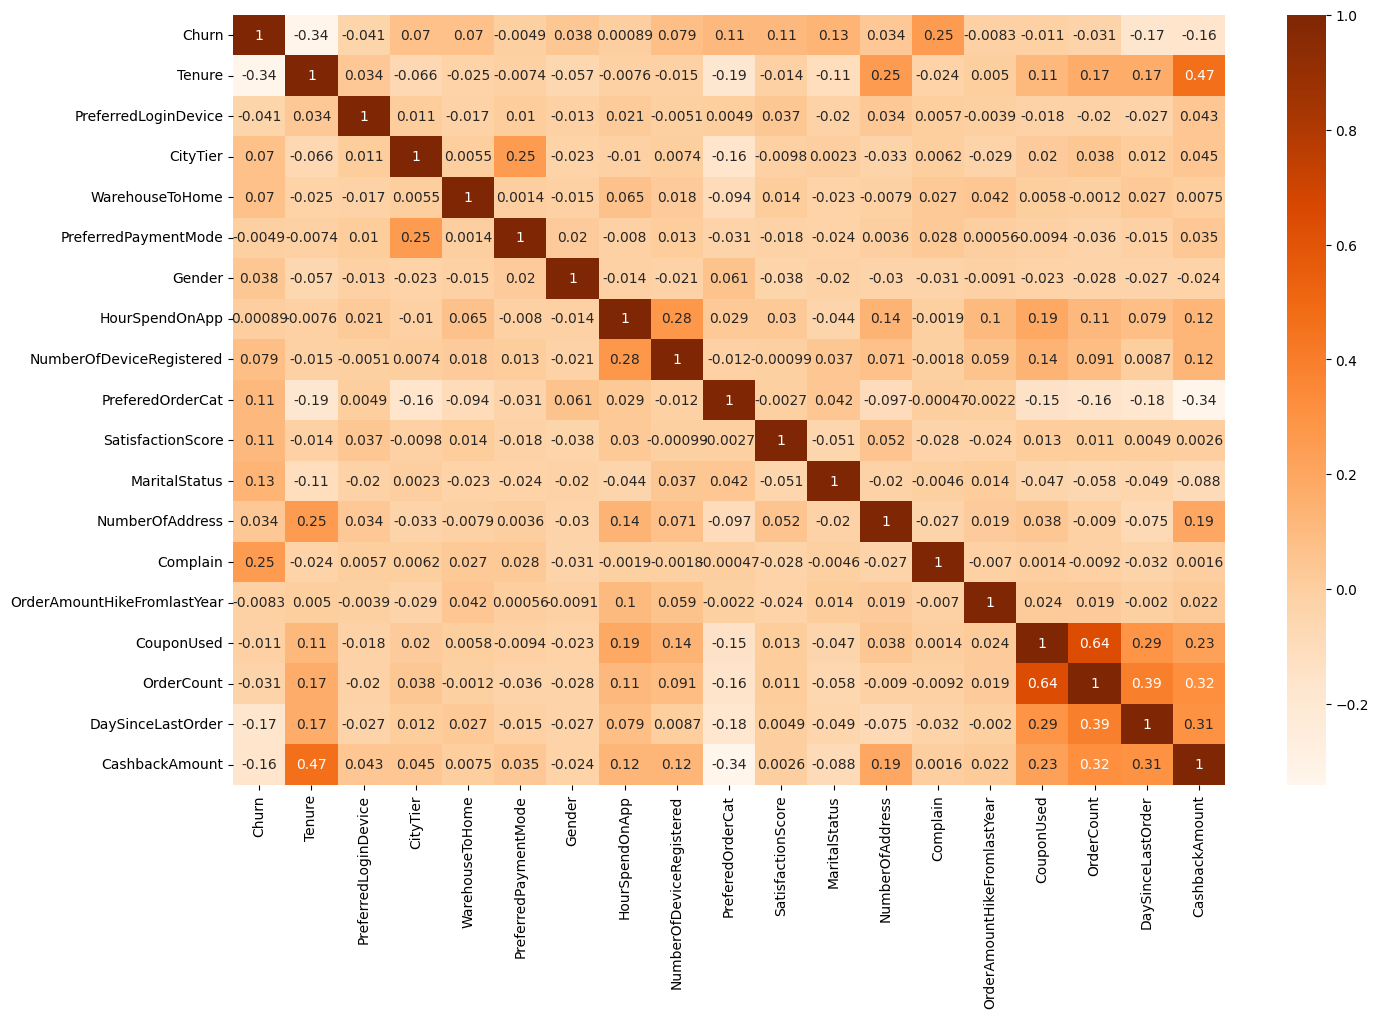

In [43]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr() , annot = True , cmap = 'Oranges')

In [39]:
corr_matrix = df.corr()
corr_matrix

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.335950,-0.040957,0.069710,0.069827,-0.004939,0.038218,0.000887,0.079158,0.105073,0.108536,0.132019,0.033847,0.252183,-0.008287,-0.010879,-0.031473,-0.170018,-0.164738
Tenure,-0.335950,1.000000,0.034389,-0.065964,-0.025498,-0.007357,-0.056726,-0.007568,-0.015321,-0.185892,-0.013585,-0.108374,0.251835,-0.024084,0.005043,0.110453,0.170853,0.169273,0.466986
PreferredLoginDevice,-0.040957,0.034389,1.000000,0.010526,-0.016510,0.010353,-0.012763,0.020693,-0.005138,0.004910,0.037431,-0.020046,0.033814,0.005691,-0.003931,-0.018468,-0.020105,-0.026910,0.043034
CityTier,0.069710,-0.065964,0.010526,1.000000,0.005526,0.251772,-0.022697,-0.009981,0.007364,-0.164116,-0.009822,0.002323,-0.033113,0.006177,-0.028627,0.019766,0.037717,0.011836,0.045271
WarehouseToHome,0.069827,-0.025498,-0.016510,0.005526,1.000000,0.001429,-0.014911,0.064890,0.017773,-0.093695,0.014424,-0.023283,-0.007870,0.026709,0.041702,0.005795,-0.001236,0.027259,0.007512
PreferredPaymentMode,-0.004939,-0.007357,0.010353,0.251772,0.001429,1.000000,0.019976,-0.008046,0.013166,-0.030990,-0.018161,-0.024029,0.003638,0.028254,0.000556,-0.009413,-0.035885,-0.015452,0.034968
Gender,0.038218,-0.056726,-0.012763,-0.022697,-0.014911,0.019976,1.000000,-0.013882,-0.021172,0.061103,-0.037507,-0.019951,-0.030499,-0.030809,-0.009129,-0.022730,-0.027854,-0.026917,-0.024238
HourSpendOnApp,0.000887,-0.007568,0.020693,-0.009981,0.064890,-0.008046,-0.013882,1.000000,0.276448,0.028557,0.030377,-0.043599,0.139240,-0.001874,0.101952,0.192484,0.107173,0.079107,0.120810
NumberOfDeviceRegistered,0.079158,-0.015321,-0.005138,0.007364,0.017773,0.013166,-0.021172,0.276448,1.000000,-0.011672,-0.000990,0.037463,0.071168,-0.001841,0.059185,0.139823,0.090910,0.008722,0.120149
PreferedOrderCat,0.105073,-0.185892,0.004910,-0.164116,-0.093695,-0.030990,0.061103,0.028557,-0.011672,1.000000,-0.002744,0.042391,-0.096516,-0.000466,-0.002230,-0.145770,-0.155691,-0.178142,-0.341057


In [40]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                          1.000000
Complain                       0.252183
MaritalStatus                  0.132019
SatisfactionScore              0.108536
PreferedOrderCat               0.105073
NumberOfDeviceRegistered       0.079158
WarehouseToHome                0.069827
CityTier                       0.069710
Gender                         0.038218
NumberOfAddress                0.033847
HourSpendOnApp                 0.000887
PreferredPaymentMode          -0.004939
OrderAmountHikeFromlastYear   -0.008287
CouponUsed                    -0.010879
OrderCount                    -0.031473
PreferredLoginDevice          -0.040957
CashbackAmount                -0.164738
DaySinceLastOrder             -0.170018
Tenure                        -0.335950
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Relation Between Features and target')

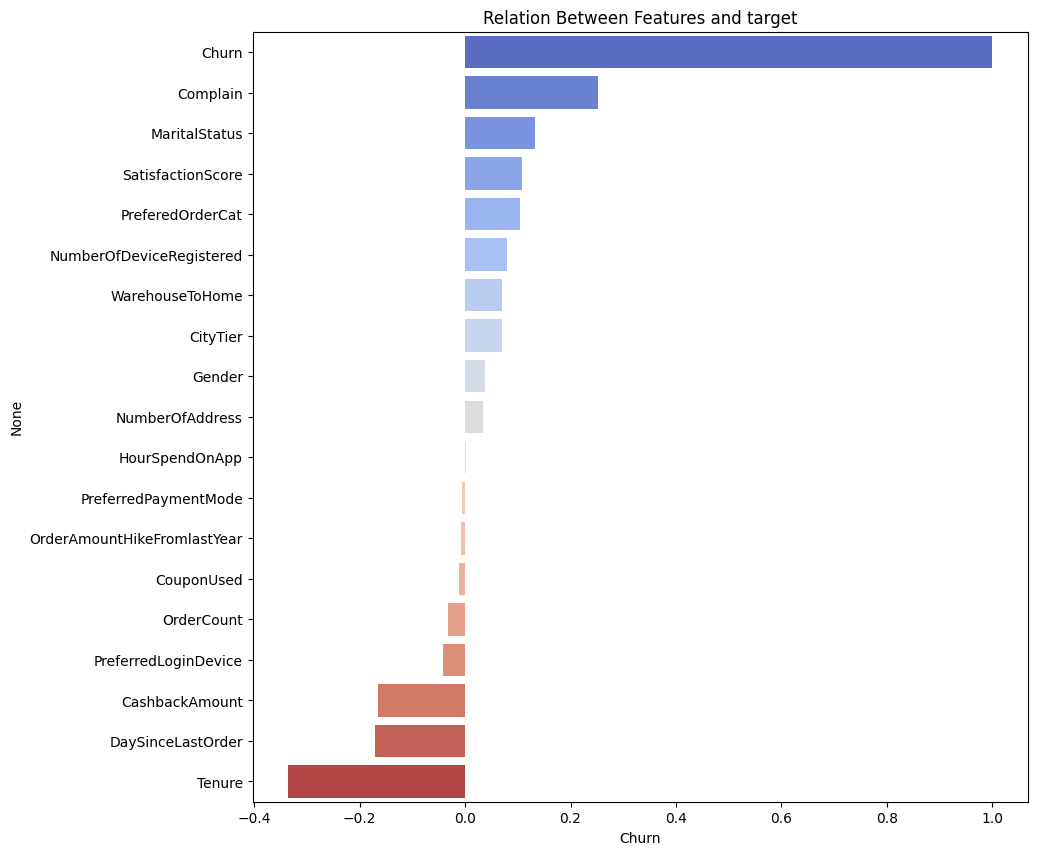

In [41]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')